In [ ]:
# this is used to unzip the file from google drive
!unzip "/content/drive/MyDrive/dog_vision/dog-breed-identification.zip"

Streaming output truncated to the last 5000 lines.
  inflating: train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: train/83fad0718581a696132c96c166472627.jpg  
  inflating: train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: train/840b67d26e5e43f8eb6430f62d4ba1ac.jpg  
  inflating: train/840db91ba4600148f3dcb06ec419b421.jpg  
  inflating: train/840dbad5a691c22611d85b2488bf4cbb.jpg  
  inflating: train/8410ced9ebc1759a7ebce5c42bfb5222.jpg  
  inflating: train/84

In [ ]:
#  import tensorflow into google colab
import tensorflow as tf
import tensorflow_hub as hub
print("TF version", tf.__version__)
print("TF_hub version", hub.__version__)

print("GPU is available" if tf.config.list_physical_devices("GPU") else "GPU not available")

TF version 2.14.0
TF_hub version 0.15.0
GPU is available


**Turing Images into tensors**

In [ ]:
# Check the labels of our data
import pandas as pd
labels_csv = pd.read_csv("/content/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [ ]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

<Axes: >

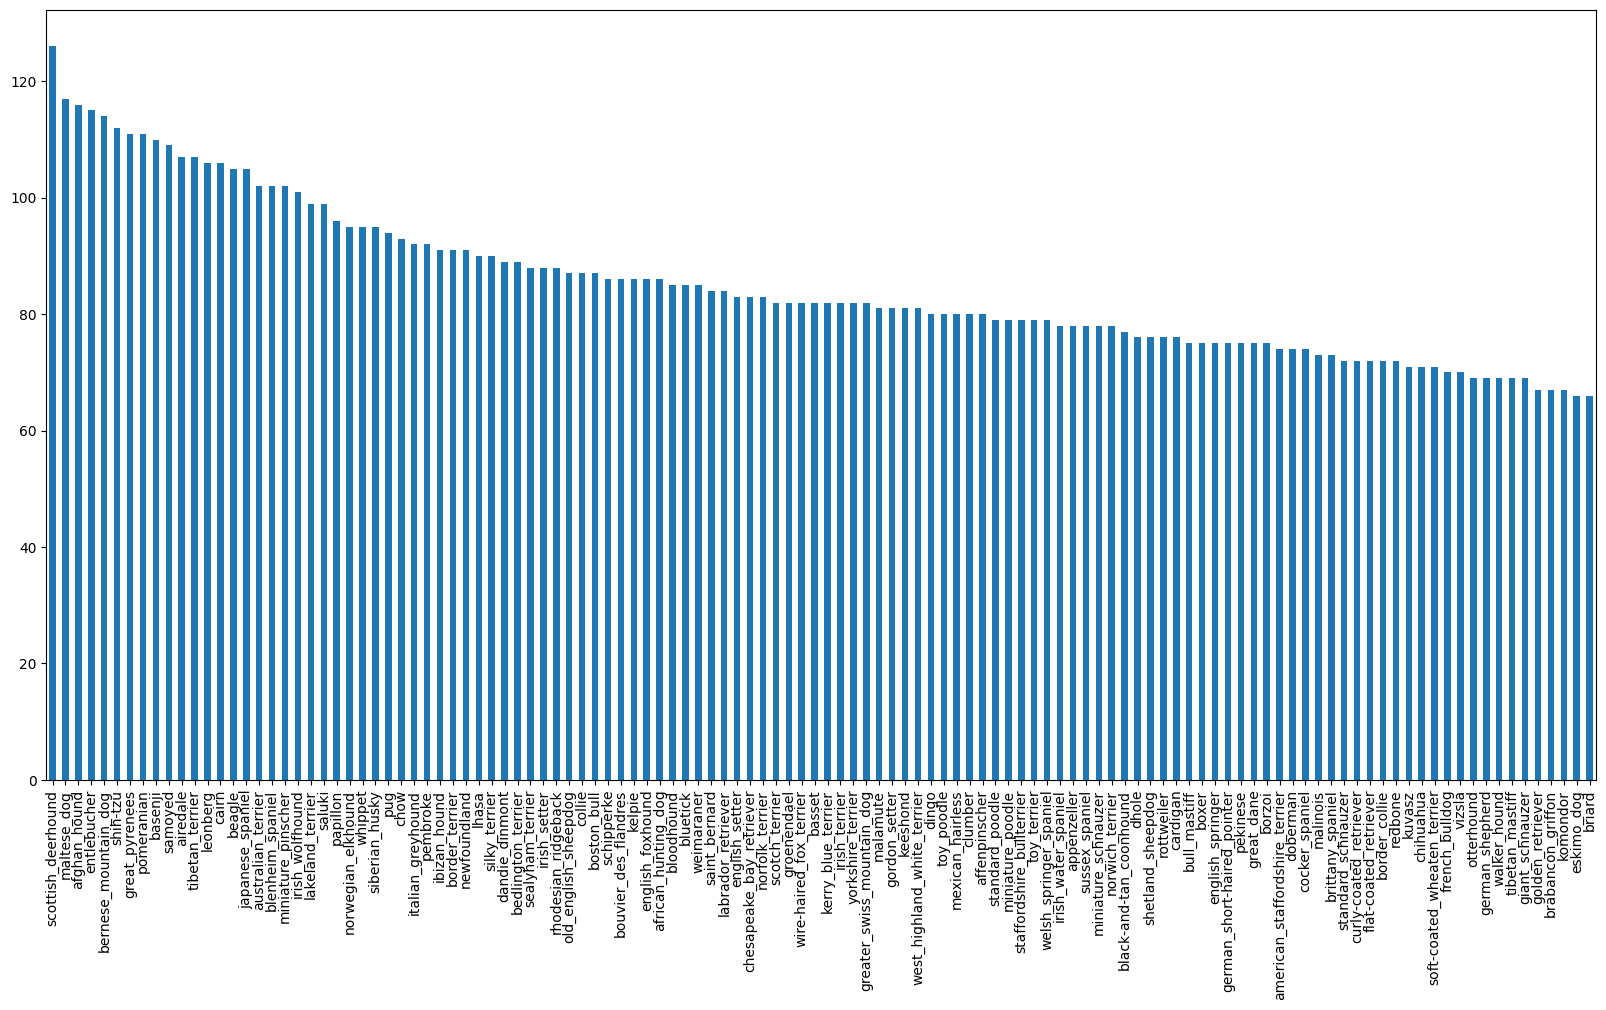

In [ ]:
# How many images are there of each breed?
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

In [ ]:
labels_csv["breed"].value_counts().median()

82.0

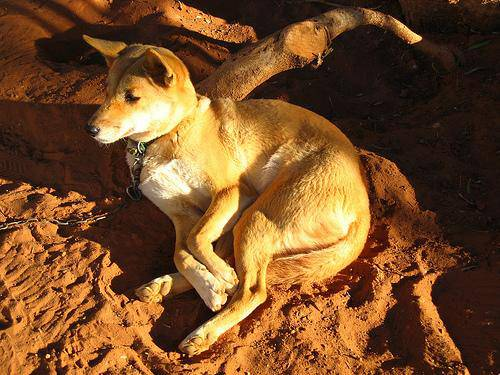

In [ ]:
# View an image
from IPython.display import Image
Image("/content/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

Getting Images and Labels

In [ ]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [ ]:
filenames = ["/content/train/" + fname + ".jpg" for fname in labels_csv["id"]]

# the first ten
filenames[:10]

['/content/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
import os
os.listdir("/content/train")[:10]

['a7ac233c1ffbcf8ceac2ed36ee0f2426.jpg',
 'd480f8d24f1479f7669c5def4e3af118.jpg',
 '02c90d8109d9a48739b9887349d92b1f.jpg',
 '5acd76effdf001f210d781caf0b3518e.jpg',
 '88435e91be34908f134a5ef10ac80dd0.jpg',
 '3d5466cf27a4355616e775c2638673e1.jpg',
 'd8951830ecd4b5898a6484327dc6f294.jpg',
 '19cd5d0eb4cd70e2a7b1b65cd097c7b9.jpg',
 '5252fae4c7a34c3e3a3971b016af37d3.jpg',
 '38accef30bc7b0158d588788b489b8d2.jpg']

In [ ]:
# Check whether number of filenames matchs number of actual image files
if len(os.listdir("/content/train")) == len(filenames):
  print("Filenames match actual amount of file")
else:
  print("Filenames do not match actual amount of files")

Filenames match actual amount of file


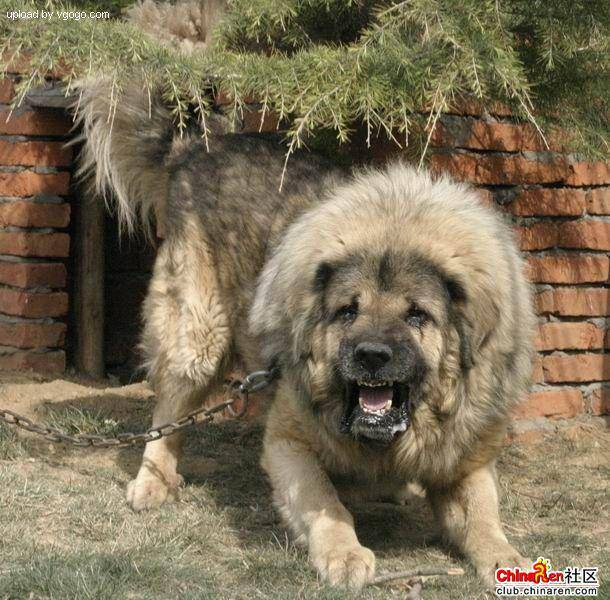

In [ ]:
# One more check
Image(filenames[9000])

In [ ]:
labels_csv["breed"][9000]

'tibetan_mastiff'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
labels = labels_csv["breed"].to_numpy()
# labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
# See if number of labels matches the number of filenames
if len(labels) == len(filenames):
  print("Number of labels matches of filenames")
else:
  print("Number of labels doesn't matche of filenames")

Number of labels matches of filenames


In [ ]:
 # Find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [ ]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# Turn every label into a boolean array
boolean_labels = [label==unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(boolean_labels)

10222

In [ ]:
# Example: Turning boolean array into integers
print(labels[0]) # original  label
print(np.where(unique_breeds==labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a q where sambel label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating Validation Set

In [ ]:

# Setup X and Y variables
X = filenames
y = boolean_labels

In [ ]:
print(len(X))
print(len(y))

10222
10222


#We will experiment with 1000 images

In [ ]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000}

In [ ]:
# Let's split our data into train and validation sets
from sklearn.model_selection import train_test_split

# Split them into training and validation of total size NUm_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],y[:NUM_IMAGES],test_size = 0.2, random_state=42)

len(X_train), len(y_train) , len(X_val), len(y_val)

(800, 800, 200, 200)

In [ ]:
X_train[:5], y_train[:5]

(['/content/train/00bee065dcec471f26394855c5c2f3de.jpg',
  '/content/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  '/content/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  '/content/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  '/content/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, F

### Preprocessing Images(turing images into Tensors)

The concept remains the same for every data
1. Take an image filepath as input
2. Use Tensorflow to read the file and save it to a varialble, `image`
3. Turn the `image` (a jpg) into Tensors
4. Normalize our image (convert colour channel values from 0-255 to 0-1).
5. Resize the `image` to be a shape of (224,224)
6. Return the modified `image`

In [ ]:
# Convert image into Numpy
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [ ]:
image.max(), image.min()

(255, 0)

In [ ]:
image

array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  51],
        [ 97,  88,  47],
        [120, 111,  70]]

In [ ]:
# Turn image into Tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>

Make a function to preprocess the tensor

In [ ]:
# Defining Image Size
IMG_SIZE = 224

# A function for preprocessing images
def process_image(image_path,img_size = IMG_SIZE):
  """
  Takes an image file path and turns the image into a tensor
  """
  # Reading in an image file
  image = tf.io.read_file(image_path)

  # Turning the jpeg image in to numerical tensor with 3 colours (Red, Green, Blue)
  image = tf.image.decode_jpeg(image,channels=3)

  #Converting the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image,tf.float32)

  # Resizing the image to our desired value (224,224)
  image = tf.image.resize(image, size=[IMG_SIZE,IMG_SIZE])

  return image

In [ ]:
tensor = tf.io.read_file(filenames[26])
# tensor

In [ ]:
tensor = tf.image.decode_jpeg(tensor,channels=3)

NameError: ignored

In [ ]:
tf.image.convert_image_dtype(tensor , tf.float32)

<tf.Tensor: shape=(500, 375, 3), dtype=float32, numpy=
array([[[0.23137257, 0.26666668, 0.25490198],
        [0.2509804 , 0.28627452, 0.27450982],
        [0.2784314 , 0.3137255 , 0.3019608 ],
        ...,
        [0.45098042, 0.5019608 , 0.42352945],
        [0.45098042, 0.5019608 , 0.42352945],
        [0.43137258, 0.48235297, 0.4039216 ]],

       [[0.25490198, 0.2901961 , 0.2784314 ],
        [0.28235295, 0.31764707, 0.30588236],
        [0.30980393, 0.34509805, 0.33333334],
        ...,
        [0.44705886, 0.49803925, 0.41960788],
        [0.45882356, 0.50980395, 0.43137258],
        [0.454902  , 0.5058824 , 0.427451  ]],

       [[0.26666668, 0.3019608 , 0.2901961 ],
        [0.29803923, 0.33333334, 0.32156864],
        [0.3254902 , 0.36078432, 0.34901962],
        ...,
        [0.44705886, 0.49803925, 0.41960788],
        [0.47058827, 0.52156866, 0.4431373 ],
        [0.48235297, 0.53333336, 0.454902  ]],

       ...,

       [[0.6784314 , 0.7843138 , 0.60784316],
        [0.64

### # Turing out data into batches

Why we turn our data into batches?

Let's say you are trying to process 10,000 images in one go....they all might not fit into the memory

So that's why we do about 32 (this is the batch size) images at a time (you can manually adjust the batch size if need be).

In order to use Tensorflow effectively, we need our data in the form of Tensor tuples which look like this:
(image,label)

In [ ]:
# Create a function to return a tuple (image, label)
def get_image_label(image_path,label):
  image = process_image(image_path)
  return image,label

In [ ]:
(process_image(X[42]),tf.constant(y[42]))
print("YES")

YES


## Now we have got a way to turn our data into tuples of Tensors in the form: (image,label), let's make a function to turn all our data (x & y) into batches

In [ ]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size = BATCH_SIZE, valid_data = False, test_data = False):
  """
  Create batches of data out of image (X) and label (y) pairs.
  It shuffles the data if it's a training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  # if test_data:
  #   print("Creating test data batches...")
  #   data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths (no labels)
  #   data_batch = data.map(process_image).batch(BATCH_SIZE)
  #   # return data_batch

  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch
  # elif valid_data:
  #   print("Creating validation data batches...")
  #   data = tf.data.Dataset.from_tensor_slices((tf.constant(X)), (tf.constant(y))) # filepaths and labels
  #   data_batch = data.map(get_image_label).batch(BATCH_SIZE)
  #   # return data_batch
  else:
    # If the data is a training dataset, we shuffle it
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y)))
  # else:
  #   print("Creating training data batches...")
  #   #Turn filepaths and labels into Tensors
  #   data = tf.data.Dataset.from_tensor_slices((tf.constant(X)), (tf.constant(y)))

    # Shuffling pathnames and labels before  mapping image processor function is father than shuffling images
    data = data.shuffle(buffer_size=len(x))

    # Create (image,label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [ ]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val,valid_data = True)

Creating training data batches...
Creating validation data batches...


In [ ]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches

The data is now in batches, however these can be a little hard to understand.

In [ ]:
import matplotlib.pyplot as plt

#Function for viewing images in a data batch
def show_25_images(images,labels):
  #Setup the fiqure
  plt.figure(figsize=(10,10))
  #Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplot (5 rows, 5 columns)
    ax = plt.subplot(5,5,i+1)
    # Display the image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    #Turn the grid lines off
    plt.axis("Off")


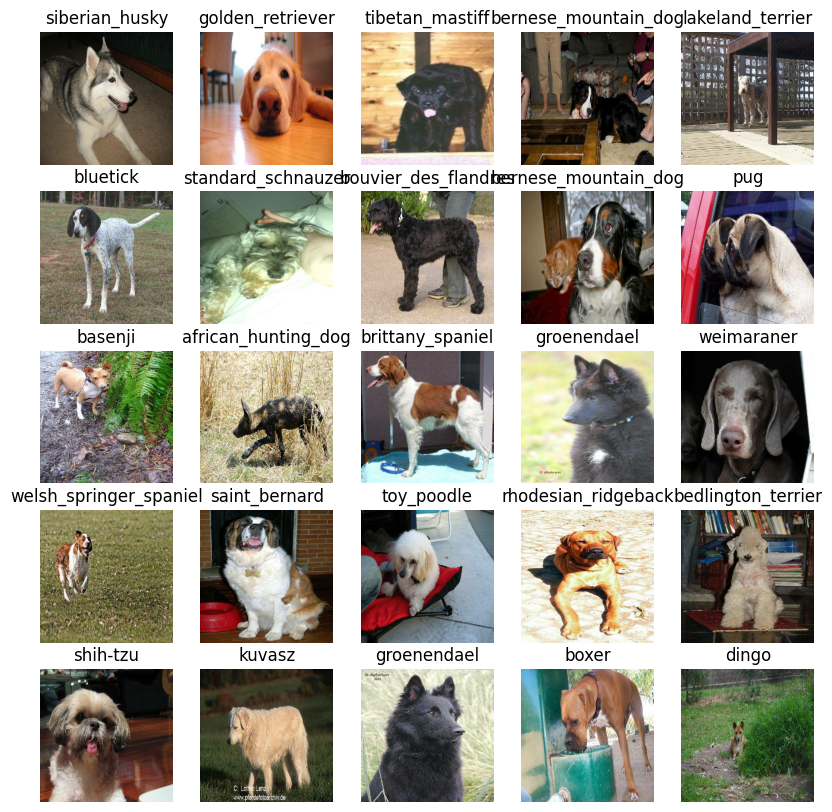

In [ ]:
# Now let's visualize the data in a training batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images,train_labels)

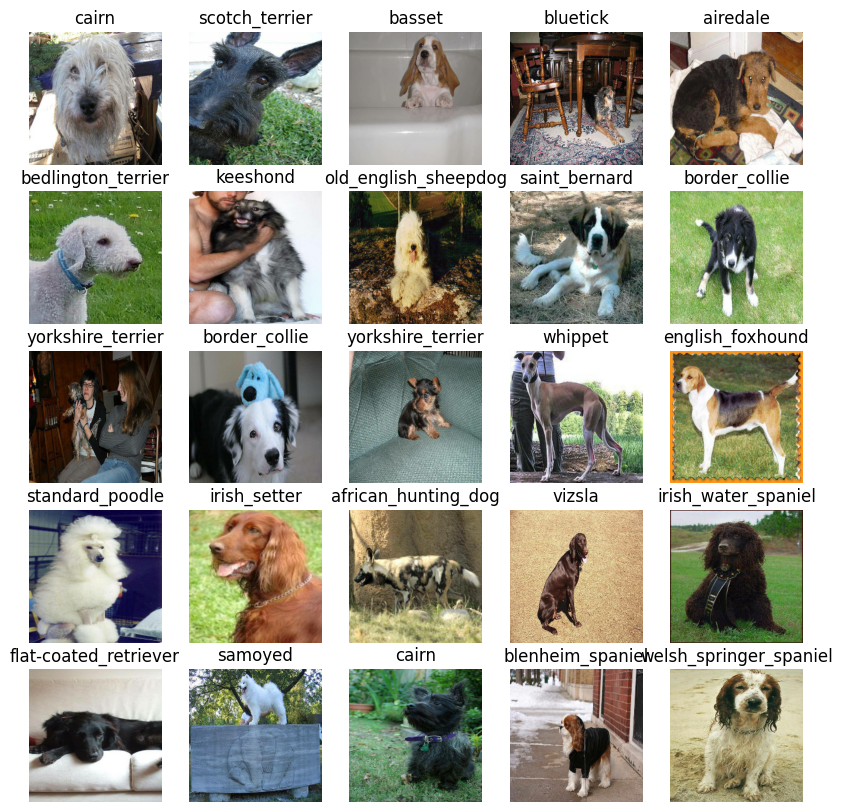

In [ ]:
#Now let's visualize our validation set
val_images,val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images,val_labels)

## Building a Model

Before we build a model, there are few things we need to define:
* The input shape(our image

In [ ]:
#Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE,3] # batch,height,width,colour channels

#Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from TensorFlow Hub
MODEL_URL = MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [ ]:
# A function which builds a keras model
def create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE,model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL),  # Layer 1 (input layer)
       tf.keras.layers.Dense(units=OUTPUT_SHAPE, activation = "softmax") #Layer 2(output layer)
  ])

  # Compile the model
  model.compile(
      loss = tf.keras.losses.CategoricalCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(),
      metrics = ["accuracy"]
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model

In [ ]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


In [ ]:
output = np.ones(shape=(1,1,1280))

# Creating Callbacks
Callbacks are helper functions a model can use during training to do such things as save it's progress, check it's progress or stop training early if a model stops improving.

we will create 2 callbacks, one for TensorBoard which helps track our models progress and another for early stopping which prevents our model from training for too long.
## TensorBoard Callback

To setup a TensorBoard callback, we need to do 3 things:

1. Load the TensorBoard notebook extension.
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's fit() function.
3. Visualize the our models training logs using the %tensorboard magic function (we'll do this later on).

In [ ]:
# Load Tensorboard notebook extension
%load_ext tensorboard

In [ ]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directiory for storing TensorBorad logs
  logdir = os.path.join("/content/drive/MyDrive/dog_vision/dog-breed-identification/Logs",datetime.datetime.now().strftime("%y%m%d-%M%M%S"))
  #make is so the logs get tracked whenever we run an expirement
  return tf.keras.callbacks.TensorBoard(logdir)

### Early Stopping Callback

Early stopping helps stop our model from overfitting by stopping training if a certain evaluation metrics stop improving.

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [ ]:
# Creating early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=3)

## Training the model (on subset of data)

Our first model is only going to train on only 1000 images, to make sure everything is working fine.


In [ ]:
NUM_EPOCHS = 100  # @param{type:"slider", min: 10, max:100, step:10}

A Function which trains a model

Create a model using create_model().
Setup a TensorBoard callback using create_tensorboard_callback() (we do this here so it creates a log directory of the current date and time).
Call the fit() function on our model passing it the training data, validatation data, number of epochs to train for and the callbacks we'd like to use.
Return the fitted model.

In [ ]:
# Build a function to train and return a trained model
def train_model():
  """
  train a given model and returns the trained version
  """
  # create a model
  model = create_model()

  #Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()
  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs= NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard,early_stopping])
  # Return the fitted model
  return model

In [ ]:
# Fit the model to the data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 17s 124ms/step - loss: 4.5760 - accuracy: 0.0925 - val_loss: 3.2224 - val_accuracy: 0.2150
Epoch 2/100
25/25 [==============================] - 3s 106ms/step - loss: 1.6177 - accuracy: 0.6875 - val_loss: 2.0340 - val_accuracy: 0.5250
Epoch 3/100
25/25 [==============================] - 2s 70ms/step - loss: 0.5564 - accuracy: 0.9400 - val_loss: 1.5970 - val_accuracy: 0.6150
Epoch 4/100
25/25 [==============================] - 2s 84ms/step - loss: 0.2516 - accuracy: 0.9912 - val_loss: 1.4184 - val_accuracy: 0.6650
Epoch 5/100
25/25 [==============================] - 2s 68ms/step - loss: 0.1454 - accuracy: 0.9962 - val_loss: 1.3536 - val_accuracy: 0.6700
Epoch 6/100
25/25 [==============================] - 2s 76ms/step - loss: 0.0999 - accuracy: 1.0000 - val_loss: 1.3184 - val_accuracy: 0.6800
Epoch 7/100
25/25 [==============================] -

**Our code is overfitting because it's performance is far better on the training dataset then the validation dataset.**

### Checking the TensorBoard logs

The TensorBoard magic function(%tensorboard) will access the logs directory we created earlier and visualize it's contents.

In [ ]:
%tensorboard  --logdir /content/drive/MyDrive/dog_vision/dog-breed-identification/Logs

<IPython.core.display.Javascript object>

# Making and evaluating predictions using a trained model

In [ ]:
# Make predictions on the validation data (not use to train on)
predictions = model.predict(val_data,verbose=1)
predictions

7/7 [==============================] - 2s 134ms/step


array([[3.37491278e-04, 5.11996986e-05, 1.23889331e-04, ...,
        2.34308172e-04, 9.51796665e-06, 3.48256063e-03],
       [4.07733722e-03, 6.50321250e-04, 1.53166000e-02, ...,
        4.58702445e-04, 1.00657961e-03, 5.64386894e-04],
       [9.50038157e-06, 1.67819700e-04, 6.15434328e-05, ...,
        8.61004519e-05, 1.26516505e-04, 1.40829186e-03],
       ...,
       [1.50434225e-05, 9.07690555e-05, 2.75494065e-04, ...,
        2.63048169e-05, 2.22717979e-04, 6.08556002e-05],
       [4.46935650e-03, 1.89614235e-04, 6.28064008e-05, ...,
        2.03900505e-04, 2.31376544e-04, 2.27266131e-03],
       [6.50945003e-04, 8.20972309e-06, 3.58365971e-04, ...,
        2.08947429e-04, 1.43681085e-04, 2.92736331e-05]], dtype=float32)

In [ ]:
predictions.shape

(200, 120)

In [ ]:
len(predictions[0])

120

In [ ]:
np.sum(predictions[0])

1.0

In [ ]:
# First prediction
print(predictions[0])

index = 0
print(f"Max value (probability of prediction): {np.max(predictions[index])}") # the max probability value predicted by the model
print(f"Sum: {np.sum(predictions[index])}") # because we used softmax activation in our model, this will be close to 1
print(f"Max index: {np.argmax(predictions[index])}") # the index of where the max value in predictions[0] occurs
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}") # the predicted label


[3.3749128e-04 5.1199699e-05 1.2388933e-04 2.1868402e-05 3.9484736e-04
 4.7121063e-04 3.8133830e-02 1.0248566e-03 1.1715503e-04 3.0277521e-04
 5.5854369e-05 3.1994547e-05 9.4468567e-05 2.9909925e-05 2.1022717e-03
 1.2477655e-03 4.1662512e-05 1.4001179e-01 8.5548600e-06 1.3722896e-04
 3.9067341e-05 6.7037072e-05 3.0394858e-06 4.2684731e-04 5.2967254e-05
 5.2703075e-05 2.8425595e-01 2.3333982e-05 2.9739723e-04 4.3976943e-05
 2.1502237e-05 4.2508708e-04 2.2525882e-04 3.0276291e-05 2.8084030e-05
 2.5910206e-02 3.9547026e-06 1.8920067e-04 7.6223980e-05 3.9886309e-05
 7.5376371e-04 3.8909520e-06 2.9979574e-05 9.9811245e-05 2.0765452e-05
 1.0272667e-04 5.6384342e-06 4.3881385e-04 7.1594673e-05 4.1717100e-05
 1.9059813e-04 1.8551365e-05 1.0143711e-03 1.2842016e-04 4.0108614e-05
 3.6338461e-06 8.9461260e-05 2.7935072e-03 3.1304255e-04 8.0713764e-02
 3.1373411e-04 4.4382301e-05 1.1326789e-03 8.1331873e-06 3.4447573e-04
 4.4857800e-02 3.4330098e-04 5.4962005e-05 9.5068365e-03 4.8330046e-05
 1.705

# Image of the dog that is being predicted

In [ ]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilites into a label
  """
  return unique_breeds[np.argmax(prediction_probabilities)]
#Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[index])
pred_label

'cairn'

Now since our validation data is still in a batch dataset
we will have to unbatchify it to make predictions on the validation images and then compare those predictions to the validation labels(truth labels)

In [ ]:
# Create a function to unbatch the batch data
def unbatchify(val_data):
  labels = []
  images = []
  # Takes a batched dataset of (image,label) Tensors and return separate arrays of image and labels.
  for image,label in val_data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels


In [ ]:
# images_ = []
# labels_ = []

# # loop through unbatched data
# for image,label in val_data.unbatch().as_numpy_iterator():
#   images_.append(image)
#   labels_.append(label)
# images_[0], labels_[0]

In [ ]:
# get_pred_label(labels_[0])

In [ ]:
# get_pred_label(predictions[0])

In [ ]:
# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

Now we've got ways to get:

1. Prediction labels
2. Validation labels (truth labels)
3. Validation images
Let's make some functions to make these all a bit more visualize.

More specifically, we want to be able to view an image, its predicted label and its actual label (true label).

The first function we'll create will:

1. Take an array of prediction probabilities, an array of truth labels, an array of images and an integer.
2. Convert the prediction probabilities to a predicted label.

3. Plot the predicted label, its predicted probability, the truth label and target image on a single plot.

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=22):
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)

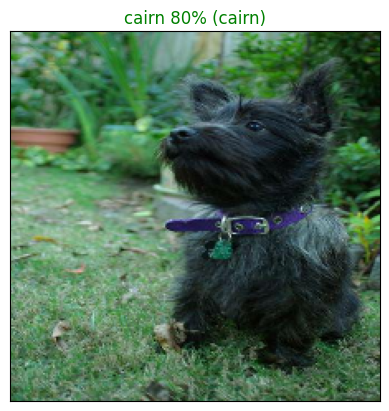

In [ ]:

plot_pred(prediction_probabilities=predictions,labels = val_labels,images = val_images)

# Create a function which predicts the top 10 dogs
This function will take:
1. Take an input of a prediction probabilities array, a ground truth labels array and an integer.
2. Find the predicted label using get_pred_label().
3. Find the top 10:

  3.1 Prediction probabilities indexes
  
  3.2 Prediction probabilities values
  3.3 Prediction labels
4. Plot the top 10 prediction probability values and labels, coloring the true label green.

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plus the top 10 highest prediction confidences along with the truth label from sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 predictions confindence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]

  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]

  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color = "grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels = top_10_pred_labels,
             rotation = "vertical")

  # Change color of true
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels==true_label)].set_color("green")
  else:
    pass

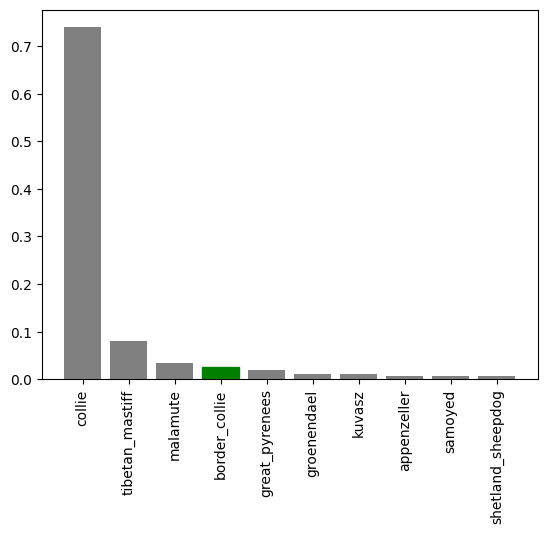

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,labels=val_labels,n=9)

In [ ]:
predictions[0]

array([3.3749128e-04, 5.1199699e-05, 1.2388933e-04, 2.1868402e-05,
       3.9484736e-04, 4.7121063e-04, 3.8133830e-02, 1.0248566e-03,
       1.1715503e-04, 3.0277521e-04, 5.5854369e-05, 3.1994547e-05,
       9.4468567e-05, 2.9909925e-05, 2.1022717e-03, 1.2477655e-03,
       4.1662512e-05, 1.4001179e-01, 8.5548600e-06, 1.3722896e-04,
       3.9067341e-05, 6.7037072e-05, 3.0394858e-06, 4.2684731e-04,
       5.2967254e-05, 5.2703075e-05, 2.8425595e-01, 2.3333982e-05,
       2.9739723e-04, 4.3976943e-05, 2.1502237e-05, 4.2508708e-04,
       2.2525882e-04, 3.0276291e-05, 2.8084030e-05, 2.5910206e-02,
       3.9547026e-06, 1.8920067e-04, 7.6223980e-05, 3.9886309e-05,
       7.5376371e-04, 3.8909520e-06, 2.9979574e-05, 9.9811245e-05,
       2.0765452e-05, 1.0272667e-04, 5.6384342e-06, 4.3881385e-04,
       7.1594673e-05, 4.1717100e-05, 1.9059813e-04, 1.8551365e-05,
       1.0143711e-03, 1.2842016e-04, 4.0108614e-05, 3.6338461e-06,
       8.9461260e-05, 2.7935072e-03, 3.1304255e-04, 8.0713764e

In [ ]:
predictions[0][predictions[0].argsort()[-10:][::-1]]

array([0.28425595, 0.17051136, 0.14001179, 0.08071376, 0.0448578 ,
       0.03813383, 0.0314    , 0.02668013, 0.02591021, 0.02236342],
      dtype=float32)

In [ ]:
predictions[0].max()

0.28425595

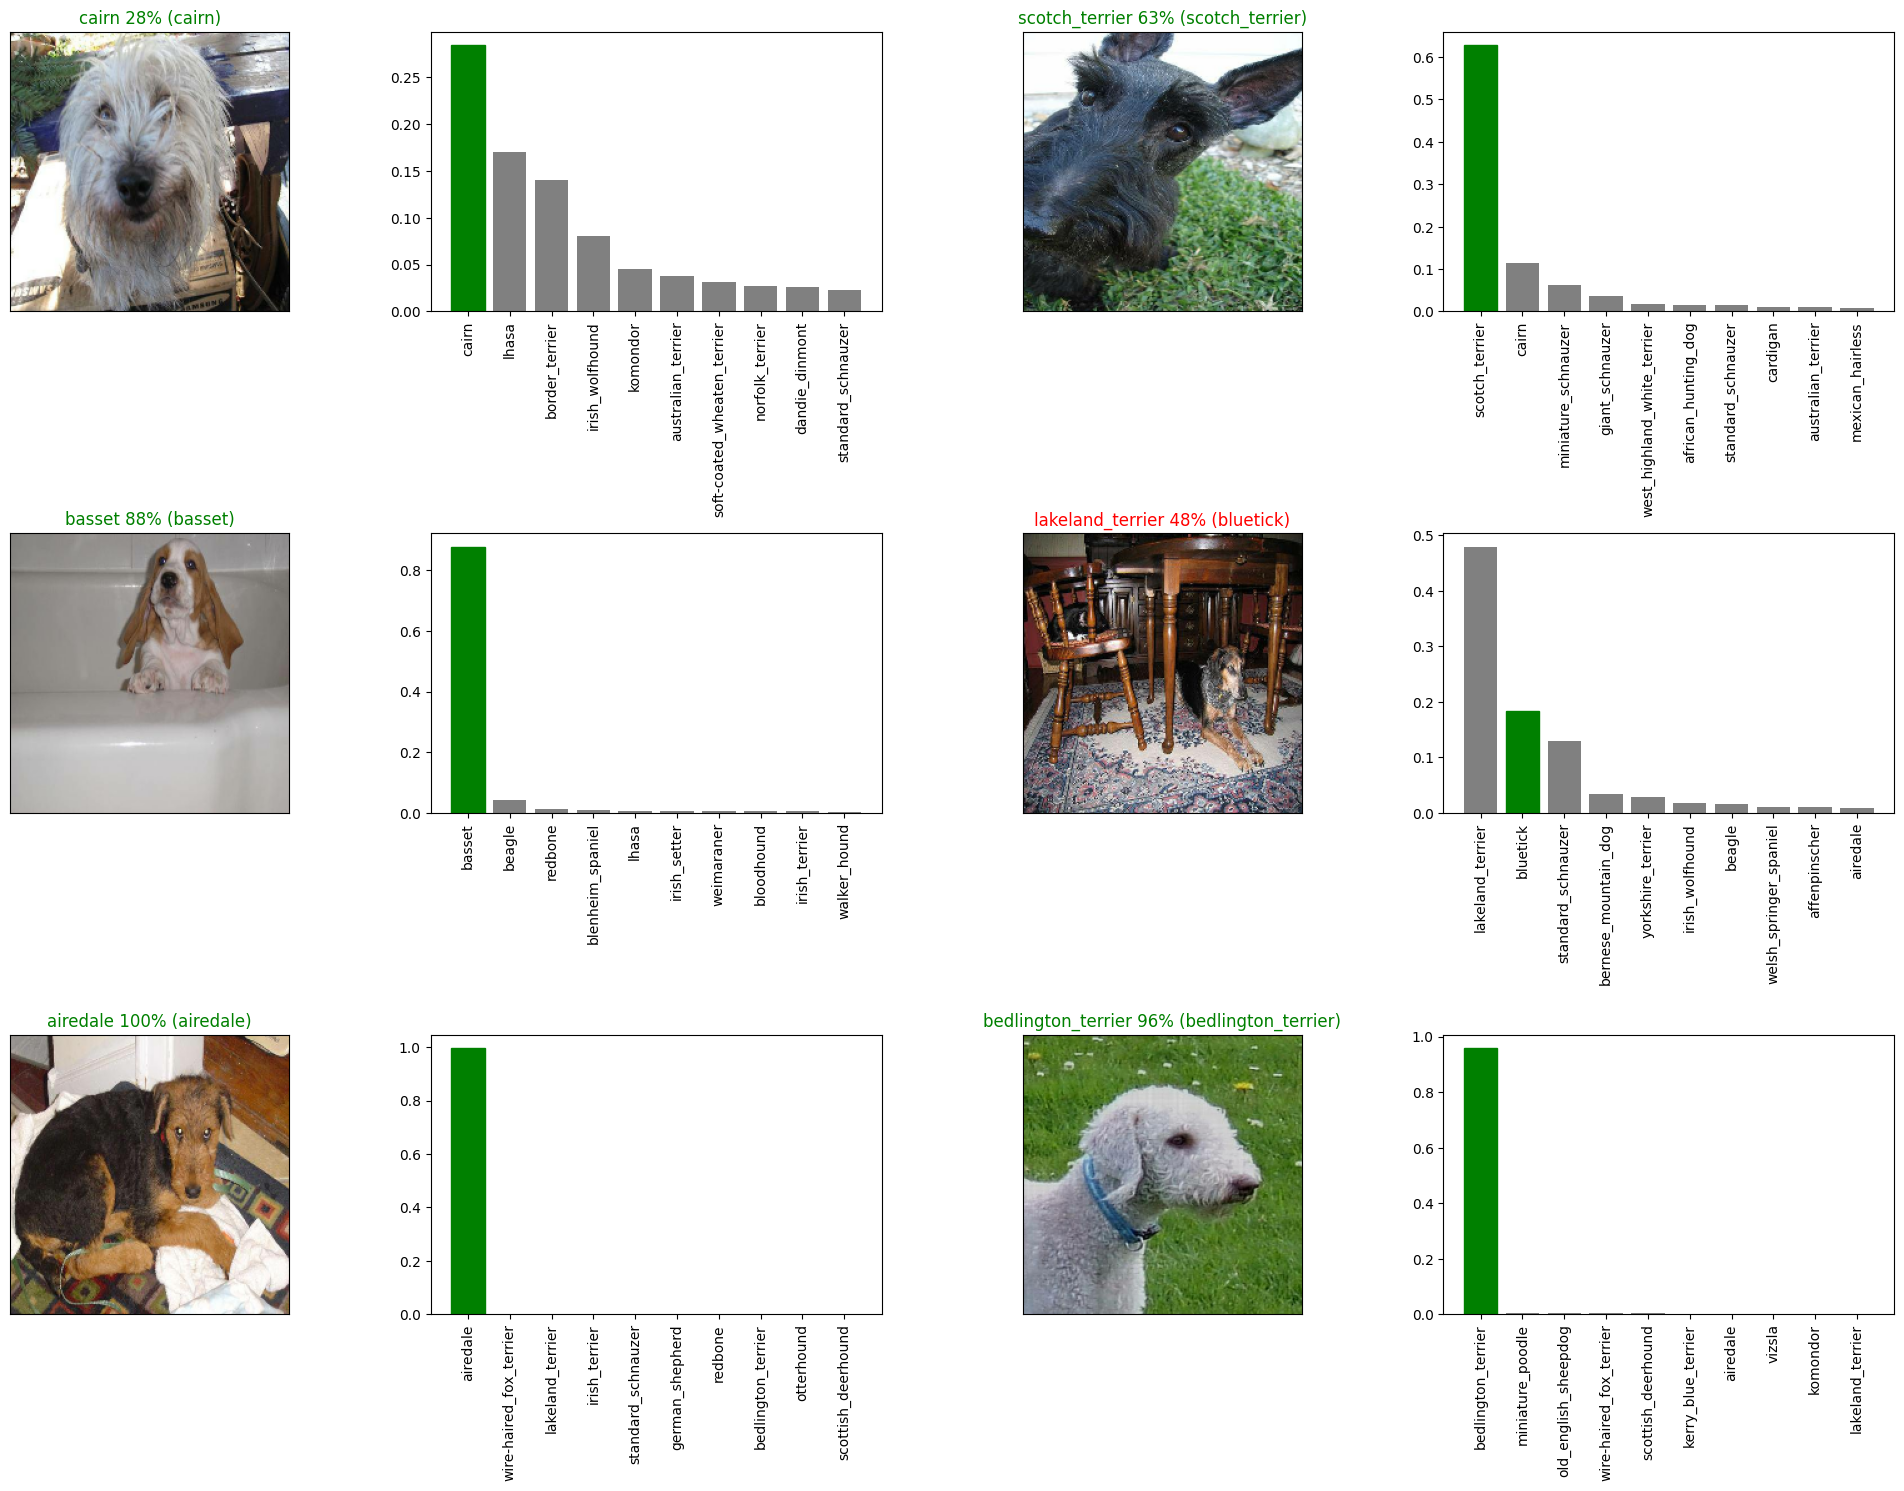

In [ ]:
# Let's check out a few predictions and their different values
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

# Saving and reloading a trained model


In [ ]:
# Function to save a model
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (str)
  for clarity and reuse.
  """
  # Create model directory with current time
  modeldir = os.path.join("drive/My Drive/Data/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [ ]:
# Function to load a model
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
# Save our model trained on 1000 images
save_model(model, suffix="1000-images-mobilenetv2-Adam")

Saving model to: drive/My Drive/Data/models/20230809-08161691569008-1000-images-mobilenetv2-Adam.h5...


'drive/My Drive/Data/models/20230809-08161691569008-1000-images-mobilenetv2-Adam.h5'

In [ ]:
# Load our model trained on 1000 images
load_model_1000_images = load_model('drive/My Drive/Data/models/20230205-12451675601154-1000-images-mobilenetv2-Adam.h5')

Loading saved model from: drive/My Drive/Data/models/20230205-12451675601154-1000-images-mobilenetv2-Adam.h5


In [ ]:
# Evaluate the pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 1s 73ms/step - loss: 1.2595 - accuracy: 0.6750


[1.2594740390777588, 0.675000011920929]

In [ ]:
# Evaluate the loaded model
load_model_1000_images.evaluate(val_data)

7/7 [==============================] - 1s 96ms/step - loss: 1.3793 - accuracy: 0.6750


[1.3793121576309204, 0.675000011920929]

# Training on full data

In [ ]:
len(X), len(y)

(10222, 10222)

In [ ]:
X[:10]

['/content/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
X_train[:10]
print(len(X_train))

800


In [ ]:
# Create a data batch with the full dataset
full_data = create_data_batches(X, y)

Creating training data batches...


In [ ]:
full_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [ ]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()

# No validation set when training on all the data, we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

**Note:** Running the cell below will take a little while because GPU we are using in the runtime has to load all of the images into memory.

In [ ]:
full_model.fit(x=full_data, epochs = NUM_EPOCHS,
               callbacks = [full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 31s 83ms/step - loss: 1.3461 - accuracy: 0.6682
Epoch 2/100
320/320 [==============================] - 23s 73ms/step - loss: 0.3975 - accuracy: 0.8808
Epoch 3/100
320/320 [==============================] - 24s 76ms/step - loss: 0.2342 - accuracy: 0.9347
Epoch 4/100
320/320 [==============================] - 24s 75ms/step - loss: 0.1556 - accuracy: 0.9613
Epoch 5/100
320/320 [==============================] - 28s 87ms/step - loss: 0.1054 - accuracy: 0.9791
Epoch 6/100
320/320 [==============================] - 24s 74ms/step - loss: 0.0786 - accuracy: 0.9853
Epoch 7/100
320/320 [==============================] - 26s 79ms/step - loss: 0.0596 - accuracy: 0.9913
Epoch 8/100
320/320 [==============================] - 26s 82ms/step - loss: 0.0453 - accuracy: 0.9950
Epoch 9/100
320/320 [==============================] - 25s 79ms/step - loss: 0.0369 - accuracy: 0.9958
Epoch 10/100
320/320 [==============================] - 25s 78ms/step - l

In [ ]:
save_model(full_model, suffix = "full-image-set-mobilenetv2-Adam")

Saving model to: drive/My Drive/Data/models/20230207-04051675742746-full-image-set-mobilenetv2-Adam.h5...


'drive/My Drive/Data/models/20230207-04051675742746-full-image-set-mobilenetv2-Adam.h5'

In [ ]:
# Load the full model
loaded_full_model = load_model("drive/My Drive/Data/models/20230205-13271675603628-full-image-set-mobilenetv2-Adam.h5")

Loading saved model from: drive/My Drive/Data/models/20230205-13271675603628-full-image-set-mobilenetv2-Adam.h5


# Making predictions on the test dataset
Since our model has been trained on images in the form of Tensor batches, to make predictions on the test data, we'll have to get it into the same format.

Luckily we created **create_data_batches()** earlier which can take a list of filenames as input and convert them into Tensor batches.

To make predictions on the test data, we'll:

* Get the test image filenames.
* Convert the filenames into test data batches using **create_data_batches()** and setting the **test_data** parameter to **True** (since there are no labels with the test images).
* Make a predictions array by passing the test data batches to the **predict**() function.

In [ ]:
# Load test image filenames
test_path = "/content/drive/MyDrive/dog_vision/dog-breed-identification/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['/content/drive/MyDrive/dog_vision/dog-breed-identification/test/e7fcdf9671a6593b638cbee42842f981.jpg',
 '/content/drive/MyDrive/dog_vision/dog-breed-identification/test/e800b6c8d2904e205d67ada800907762.jpg',
 '/content/drive/MyDrive/dog_vision/dog-breed-identification/test/e7feb64da6aae1ef8e62453f6660d0c5.jpg',
 '/content/drive/MyDrive/dog_vision/dog-breed-identification/test/e78b50f1d12148deef4c564ea4c88050.jpg',
 '/content/drive/MyDrive/dog_vision/dog-breed-identification/test/e7b608110b0e29120d8740f37e85f3d0.jpg',
 '/content/drive/MyDrive/dog_vision/dog-breed-identification/test/e76a58909e6e1196bdefb3105060bcbe.jpg',
 '/content/drive/MyDrive/dog_vision/dog-breed-identification/test/e7ce78e874945f182a4f5149aa505b09.jpg',
 '/content/drive/MyDrive/dog_vision/dog-breed-identification/test/e783e22d4f370b6cc0b1f44b4d6584a8.jpg',
 '/content/drive/MyDrive/dog_vision/dog-breed-identification/test/e7be7b911a4cba9fdfa4105ec4776370.jpg',
 '/content/drive/MyDrive/dog_vision/dog-breed-identific

In [ ]:
len(test_filenames)

10357

In [ ]:
# Create the data batch
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


In [ ]:
test_data

<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

**Note:**
Prediction is going to take time because training has 10000+ images

In [ ]:
# Make predictions on test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1)

324/324 [==============================] - 44s 135ms/step


In [ ]:
# Save predictions (Numpy array) to csv file to access late
np.savetxt("/content/drive/MyDrive/dog_vision/dog-breed-identification/preds_array.csv", test_predictions, delimiter =",")

In [ ]:
# Load predictions (numpy array) from csv file
test_predictions = np.loadtxt("/content/drive/MyDrive/dog_vision/dog-breed-identification/preds_array.csv", delimiter=",")

In [ ]:
test_predictions[:10]

array([[4.22462045e-15, 5.15520081e-13, 1.24823234e-13, ...,
        1.00090275e-11, 1.51247504e-12, 5.83043430e-16],
       [6.27068619e-10, 1.09250942e-11, 5.78976866e-09, ...,
        1.02108496e-03, 6.67307063e-07, 6.35331787e-11],
       [1.52765210e-06, 6.35887991e-05, 2.40225706e-08, ...,
        1.90517930e-08, 5.56789672e-08, 7.76523375e-05],
       ...,
       [5.50019408e-08, 1.50347582e-10, 2.06173922e-08, ...,
        1.60116942e-05, 4.91272745e-10, 5.95824057e-09],
       [8.15914291e-07, 2.76028040e-05, 6.23633923e-06, ...,
        1.24346552e-05, 4.49528814e-09, 2.41147916e-07],
       [6.09667003e-01, 1.72409536e-08, 2.40157618e-08, ...,
        1.83063575e-09, 1.11984590e-07, 3.18380451e-04]])

In [ ]:
test_predictions.shape

(10357, 120)

## Preparing test dataset for kaggle


In [ ]:
## Preparing test dataset predictions for kaggle

# ["id"] + list(unique_breeds)

In [ ]:
preds_df = pd.DataFrame(columns = ["id"] + list(unique_breeds))
preds_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [ ]:
test_path

'/content/drive/MyDrive/dog_vision/dog-breed-identification/test/'

In [ ]:
# Append test image ID's to prediction DataFrame
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
# test_ids

In [ ]:
preds_df["id"] = test_ids

In [ ]:
preds_df["id"].head()

0    e7fcdf9671a6593b638cbee42842f981
1    e800b6c8d2904e205d67ada800907762
2    e7feb64da6aae1ef8e62453f6660d0c5
3    e78b50f1d12148deef4c564ea4c88050
4    e7b608110b0e29120d8740f37e85f3d0
Name: id, dtype: object

In [ ]:
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

id  affenpinscher  afghan_hound  \
0  e7fcdf9671a6593b638cbee42842f981   4.224620e-15  5.155201e-13   
1  e800b6c8d2904e205d67ada800907762   6.270686e-10  1.092509e-11   
2  e7feb64da6aae1ef8e62453f6660d0c5   1.527652e-06  6.358880e-05   
3  e78b50f1d12148deef4c564ea4c88050   4.408027e-12  2.204676e-09   
4  e7b608110b0e29120d8740f37e85f3d0   5.406665e-07  1.814151e-12   

   african_hunting_dog      airedale  american_staffordshire_terrier  \
0         1.248232e-13  8.591416e-13                    5.527496e-13   
1         5.789769e-09  4.219700e-13                    1.772128e-05   
2         2.402257e-08  2.017925e-07                    2.932372e-06   
3         1.470077e-09  2.002383e-12                    1.851077e-14   
4         2.033930e-10  4.184041e-10                    5.761598e-09   

    appenzeller  australian_terrier       basenji        basset  ...  \
0  6.703076e-12        6.034137e-13  3.518030e-13  3.758581e-11  ...   
1  6.115839e-07        2.703504e-06  9.462909e-01  8.645694e-08  ...   
2  2.757147e-06        4.875585e-06  3.057615e-07  4.313465e-08  ...   
3  8.481890e-13        6.957099e-15  1.324319e-14  1.150817e-16  ...   
4  7.495826e-10        7.783904e-11  1.429066e-09  9.414712e-12  ...   

     toy_poodle   toy_terrier        vizsla  walker_hound    weimaraner  \
0  1.192787e-15  5.093358e-15  1.362741e-15  1.725856e-11  7.897234e-16   
1  2.546272e-08  3.998674e-07  5.488864e-08  4.506437e-05  3.613042e-07   
2  5.649115e-03  2.863598e-07  1.332699e-05  1.855486e-07  4.007337e-07   
3  1.044559e-11  1.517202e-13  4.801353e-11  6.049030e-09  2.843461e-10   
4  4.212899e-11  9.337501e-10  2.287773e-10  2.909074e-09  4.707406e-09   

   welsh_springer_spaniel  west_highland_white_terrier       whippet  \
0            1.000000e+00                 1.122078e-12  1.000903e-11   
1            4.853871e-06                 6.315078e-08  1.021085e-03   
2            2.957348e-07                 8.013943e-09  1.905179e-08   
3            4.072926e-16                 1.393995e-13  5.577362e-08   
4            4.488924e-10                 3.092253e-10  4.337887e-10   

   wire-haired_fox_terrier  yorkshire_terrier  
0             1.512475e-12       5.830434e-16  
1             6.673071e-07       6.353318e-11  
2             5.567897e-08       7.765234e-05  
3             5.981835e-11       5.026705e-13  
4             2.972796e-11       1.117082e-08  

[5 rows x 121 columns]

In [ ]:
preds_df.to_csv("/content/drive/MyDrive/dog_vision/dog-breed-identification/full_model_predictions_submission_1_mobilenetv2.csv",
                index = False)

# Making predictions on custom input
* Get the filepaths of our own images.
* Turn the filepaths into data batches using create_data_batches(). And since our custom images won't have labels, we set the test_data parameter to True.
* Pass the custom image data batch to our model's predict() method.
* Convert the prediction output probabilities to prediction labels.
* Compare the predicted labels to the custom images.

In [ ]:
# Get custom image filepaths
custom_path = "/content/drive/MyDrive/dog_vision/dog-breed-identification/custom_images/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]
custom_image_paths

['/content/drive/MyDrive/dog_vision/dog-breed-identification/custom_images/labrador_2_image.jpeg',
 '/content/drive/MyDrive/dog_vision/dog-breed-identification/custom_images/labrador_1_image.jpeg',
 '/content/drive/MyDrive/dog_vision/dog-breed-identification/custom_images/khushi_dog.jpg']

In [ ]:
# Turn custom images into batch datasets
custom_data = create_data_batches(custom_image_paths, test_data = True)
custom_data

Creating test data batches...


<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
# Make predictions on the custom data
# custom_preds = load_full_model.predict(custom_data)
custom_preds = loaded_full_model.predict(custom_data)

1/1 [==============================] - 1s 1s/step


In [ ]:
custom_preds.shape

(3, 120)

In [ ]:
# Get custom image predicton label
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]

In [ ]:
custom_pred_labels

['labrador_retriever', 'labrador_retriever', 'great_dane']

In [ ]:
# Get custom images(our batchify fucntion won't work because there is no labels)
custom_images = []

# Loop through unbatched data

for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

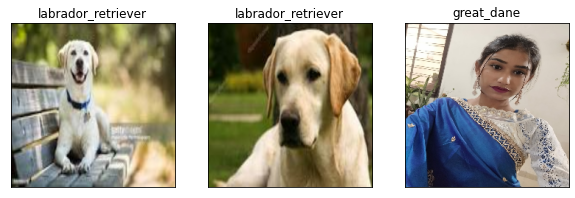

In [ ]:
# Check custom image predictions
plt.figure(figsize= (10,10))
for i, image in enumerate(custom_images):
  plt.subplot(1,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)